In [1]:
import os, sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from STutils.pl import plot_cellbin_gradient, plot_cellbin_discrete, getDefaultColors

In [3]:
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=16,vector_friendly=True,figsize=(5,5))
sc._settings.ScanpyConfig(figdir='./',n_jobs=30)

In [4]:
import yaml
with open('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/sample.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)
samplelist = list(sample_dict.keys())
samplenames = list(sample_dict.values())
samplenames

['P0_T',
 'P2_PT',
 'P3_T',
 'P4_PT',
 'P11_PT',
 'P13_PT',
 'P14_T',
 'P14_PT',
 'P18_PT',
 'P20_T',
 'P20_PT']

In [5]:
od = '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.2_cellbin_spatial_plot/celltype_spatial_plot3'
os.system(f'mkdir -p {od}')
os.chdir(od)

In [20]:
sample = 'SS200000148TR_D1'

In [21]:
adata = sc.read(f'/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.1_cellbin_rawdata/rawdata/adata_{sample_dict[sample]}.h5ad')

In [22]:
adata

AnnData object with n_obs × n_vars = 179045 × 37781
    obs: 'orig.ident', 'x', 'y', 'P2_Tum_1', 'T_CD8_GZMK_NMF_7', 'B_IGHD_NMF_1', 'T_CD4NV_CM_rest_NMF_8', 'T_CD4_unknown_NMF_12', 'T_CD8_KLRC1_NMF12', 'Fibro_CFD_NMF_3_6_17', 'T_CD4_IL2RA_NMF_10', 'T_CD4_unknown_NMF_9', 'T_CD8_CXCL13_NMF_17', 'NK_NMF_5', 'T_HSPA1A_NMF_19', 'B_AIM2_NMF_2', 'Macro_SPP1_NMF_7_23', 'T_CD8_PRSS1_NMF_20', 'Fibro_APOD_NMF_5', 'Endo_CD36_NMF_13_16', 'Macro_CPM_NMF_13', 'Macro_CD1A_NMF_5_6', 'PVL_NMF_7_18', 'P2_PCDHGC3_NMF_29', 'NK_PRSS1_NMF_15', 'Macro_NMF_3', 'Macro_NMF_4', 'Endo_ACKR1_NMF_14', 'mastCell', 'Endo_EDN1_NMF_22', 'Macro_C3_NMF_11', 'Fibro_COL11A1_NMF_4', 'Macro_IL1R2_NMF_15', 'Macro_PLTP_NMF_19', 'Duct1_NTRK2_NMF_2', 'T_cycling_NMF_3', 'Macro_cycling_NMF_26', 'Acinar_NMF_8', 'P2_TNFAIP3_NMF_28', 'Duct_MMP7_NMF_10', 'Acinar_REG3G_NMF_14', 'Duct2_CEACAM6_NMF_7', 'B_RGS2_NMF_8', 'Macro_TFF2_NMF_21', 'Plasma_IGKC_NMF_15', 'Fibro_NMF_9', 'Acinar_NMF_15', 'Endo_CCL21_NMF_23', 'Acinar_RBPJL_NMF_11', 'F

In [23]:
rename_dict = {'Fibroblast_Cell':'Fibroblast','Acinar_Cell':'Acinar','Endothelial_Cell':'Endothelial','PVL_Cell':'Stellate','Endocrine_Cell':'Endocrine','Nerve_Cell':'Neuron','Macrophage_Cell':'Macrophage'}
adata.obs['celltype'] = adata.obs['celltype'].replace(rename_dict)
adata.obs['celltype'] = pd.Categorical(adata.obs['celltype'], categories=sorted(adata.obs['celltype'].unique()))

In [24]:
resolution = 'celltype'
clusters = adata.obs[resolution].cat.categories
cluster_number = clusters.shape[0]
colors = getDefaultColors(cluster_number, type=2)
flout = open(f"color_{resolution}_{sample_dict[sample]}.list", 'w')
for i in range(cluster_number):
    if clusters[i] == 'Low_Quanlity_Cell':
        flout.write(clusters[i] + '\t#808080\n')
    elif clusters[i] == 'Undefined_Cell':
        flout.write(clusters[i] + '\t#D3D3D3\n')
    else:
        flout.write(clusters[i] + '\t' + colors[i] + '\n')
flout.close()

In [ ]:
colors = [
                "#437BFE", "#FEC643", "#43FE69", "#FE6943", "#C643FE",
                "#43D9FE", "#B87A3D", "#679966", "#993333", "#7F6699",
                "#E78AC3", "#333399", "#A6D854", "#E5C494"
            ]
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors)
cmap

In [ ]:
colors = [
                "#87b3d4", "#d5492f", "#6bd155", "#683ec2", "#c9d754",
                "#d04dc7", "#81d8ae", "#d34a76", "#607d3a", "#6d76cb",
                "#ce9d3f", "#81357a", "#d3c3a4", "#3c2f5a", "#b96f49",
                "#4e857e", "#6e282c", "#d293c8", "#393a2a", "#997579"
            ]
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors)
cmap

In [ ]:
colors = [
    "#628bac", "#ceda3f", "#7e39c9", "#72d852", "#d849cc",
    "#5e8f37", "#5956c8", "#cfa53f", "#392766", "#c7da8b",
    "#8d378c", "#68d9a3", "#dd3e34", "#8ed4d5", "#d84787",
    "#498770", "#c581d3", "#d27333", "#6680cb", "#83662e",
    "#cab7da", "#364627", "#d16263", "#2d384d", "#e0b495",
    "#4b272a", "#919071", "#7b3860", "#843028", "#bb7d91"
]
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors)
cmap

In [ ]:
colors = [
    "#ff1a1a", "#1aff1a", "#1a1aff", "#ffff1a", "#ff1aff", "#ff8d1a",
    "#7cd5c8", "#c49a3f", "#5d8d9c", "#90353b", "#507d41", "#502e71",
    "#1B9E77", "#c5383c", "#0081d1", "#674c2a", "#c8b693", "#aed688",
    "#f6a97a", "#c6a5cc", "#798234", "#6b42c8", "#cf4c8b", "#666666",
    "#ffd900", "#feb308", "#cb7c77", "#68d359", "#6a7dc9", "#c9d73d"
]
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors)
cmap

In [10]:
from collections import OrderedDict
from PIL import Image

Image.MAX_IMAGE_PIXELS = None


def plot_cellbin_discrete(
    adata, mask, tag, prefix, colors, dpi=600, edge_cut=300, add_scale_bar=True, scale=0.5, length_fraction=0.25
):
    """
    params:
        adata: AnnData object
        mask: mask file path
        tag: tag name in adata.obs
        prefix: prefix of output file
        colors: color palette in getDefaultcolors
        dpi: dpi of output file
        edge_cut: pixels to retain in edge cutting
    """
    res = pd.DataFrame(adata.obs, columns=["x", "y", tag], index=adata.obs.index)
    res = res.sort_values(by=tag)
    res.to_csv(f"bin1clu_{tag}_{prefix}.txt", sep="\t", index=False)  # write to file
    clusters = res[tag].unique()
    cluster_number = clusters.shape[0]
    color_palette_fl = open(colors, "r").readlines()
    color_palette = OrderedDict()
    for line in color_palette_fl:
        color_palette[line.split("\t")[0]] = line.split("\t")[1].strip()
    # sort clusters by color_palette.keys()
    clusters = [cluster for cluster in color_palette.keys() if cluster in clusters]
    # colors = getDefaultColors(cluster_number, type=colors)
    # flout = open(f"color_{tag}_{prefix}.list", 'w')
    # for i in range(cluster_number):
    #     flout.write(str(clusters[i]) + '\t' + colors[i] + '\n')
    # flout.close()  # write to file
    tif = f"{tag}_{prefix}_spatial.tif"
    os.system(
        f"/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/bin/cell_bin_plot bin1clu_{tag}_{prefix}.txt {mask} {colors} {tif}"
    )  # draw cellbin discrete tif
    img = plt.imread(tif)
    im = img.copy()
    # cut black edge of im
    non_black_coords = np.argwhere(im.sum(axis=2) > 0)
    y1, x1 = non_black_coords.min(axis=0)
    y2, x2 = non_black_coords.max(axis=0)
    im = im[y1 - edge_cut : y2 + 1000, x1 - edge_cut : x2 + edge_cut]
    # replace black background with white
    black_pixels = (im[:, :, 0] == 0) & (im[:, :, 1] == 0) & (im[:, :, 2] == 0)
    im[black_pixels] = [255, 255, 255]
    # draw color legend
    fig, ax = plt.subplots(figsize=(5, 5), dpi=dpi, gridspec_kw={"wspace": 0, "hspace": 0})
    plt.subplots_adjust(0, 0, 1, 1)
    ax.axis("off")
    ax.imshow(im)
    if add_scale_bar:
        from matplotlib_scalebar.scalebar import ScaleBar

        scalebar = ScaleBar(scale, "um", length_fraction=length_fraction, frameon=False, location="lower right")
        ax.add_artist(scalebar)
    # fig.patch.set_facecolor('black')
    # Create a legend for the discrete colors
    legend_labels = [str(cluster) for cluster in clusters]  # Assuming clusters is a list of labels
    legend_patches = [
        mpl.patches.Patch(color=color_palette[legend_labels[i]], label=legend_labels[i]) for i in range(cluster_number)
    ]

    # Add a legend to the figure
    legend = ax.legend(handles=legend_patches, loc="lower left", fontsize=8, bbox_to_anchor=(1.05, 0))
    legend.set_title(tag, prop={"size": 8, "weight": "bold"})
    # set legend text color white
    legend.get_title().set_color("black")
    for text in legend.get_texts():
        text.set_color("black")
    outfig = f"{tag}_{prefix}_spatial.pdf"
    fig.savefig(outfig, dpi=dpi, format="pdf", bbox_inches="tight")
    return ax

In [30]:
color_palette

{'Acinar': '#43FE69',
 'B_Cell': '#B87A3D',
 'Duct_Cell': '#E5C494',
 'Duct_like_Cell': '#952e8f',
 'Endocrine': '#FEC643',
 'Endothelial': '#43D9FE',
 'Fibroblast': '#437BFE',
 'Macrophage': '#679966',
 'Mast_Cell': '#993333',
 'Neuron': '#333399',
 'PVL_Cell': '#cffdbc',
 'Plasma_Cell': '#7F6699',
 'T/NK_Cell': '#E78AC3',
 'Tumor_Cell': '#FE6943',
 'Undefined_Cell': '#D3D3D3',
 'Low_Quanlity_Cell': '#808080'}

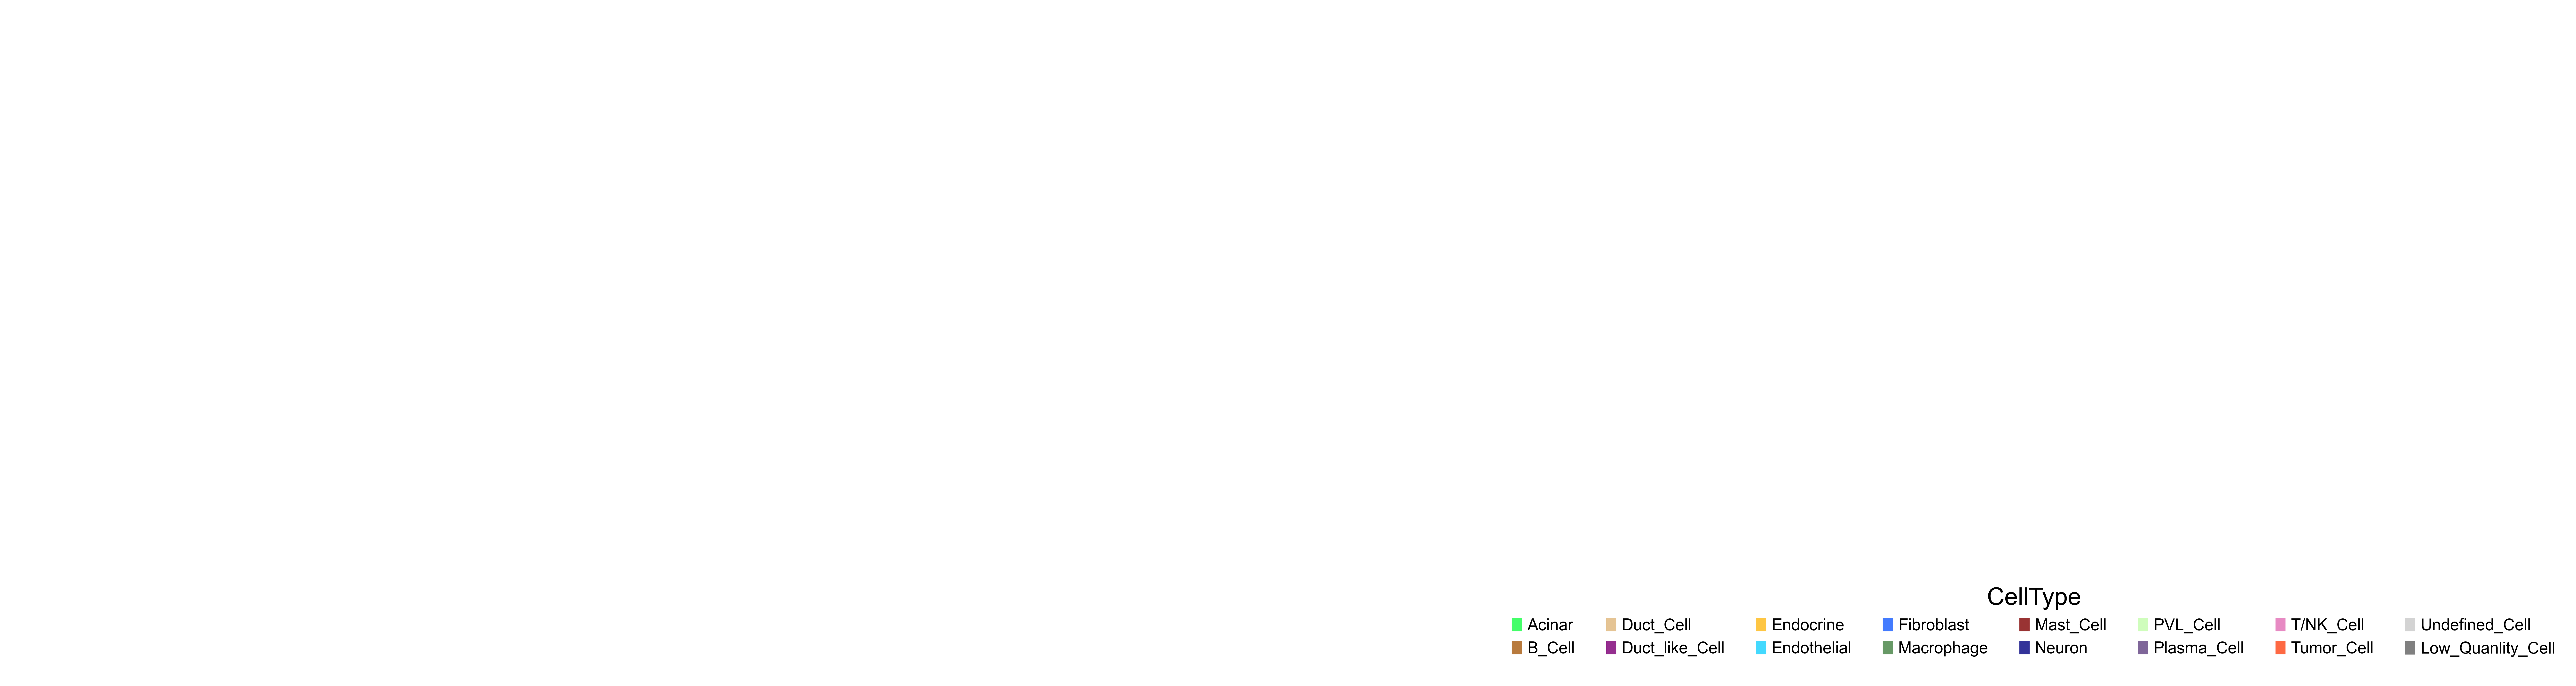

In [32]:
fig, ax = plt.subplots(figsize=(18, 5), dpi=300, gridspec_kw={"wspace": 0, "hspace": 0})
ax.axis("off")
colors = "/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.2_cellbin_spatial_plot/celltype_spatial_plot3/color_celltype.list"
color_palette_fl = open(colors, "r").readlines()
color_palette = {}
for line in color_palette_fl:
    color_palette[line.split("\t")[0]] = line.split("\t")[1].strip()
clusters = list(color_palette.keys())
legend_labels = [str(cluster) for cluster in clusters]  # Assuming clusters is a list of labels
legend_patches = [
    mpl.patches.Patch(color=color_palette[legend_labels[i]], label=legend_labels[i]) for i in range(len(legend_labels))
]

# Add a legend to the figure
legend = ax.legend(handles=legend_patches, loc="lower left", fontsize=8, bbox_to_anchor=(1.05, 0), ncol=8)
legend.set_title("CellType", prop={"size": 12, "weight": "bold"})
# set legend text color white
legend.get_title().set_color("black")
for text in legend.get_texts():
    text.set_color("black")
plt.savefig("legend.pdf", dpi=300, format="pdf", bbox_inches="tight")

In [11]:
colors = '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.2_cellbin_spatial_plot/celltype_spatial_plot3/color_celltype.list'
for sample in samplelist:
    adata = sc.read(f'/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.1_cellbin_rawdata/rawdata/adata_{sample_dict[sample]}.h5ad')
    rename_dict = {'Fibroblast_Cell':'Fibroblast','Acinar_Cell':'Acinar','Endothelial_Cell':'Endothelial','Endocrine_Cell':'Endocrine','Nerve_Cell':'Neuron','Macrophage_Cell':'Macrophage'}
    adata.obs['celltype'] = adata.obs['celltype'].replace(rename_dict)
    adata.obs['celltype'] = pd.Categorical(adata.obs['celltype'], categories=sorted(adata.obs['celltype'].unique()))
    resolution = 'celltype'
    mask = f'/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/rawdata/{sample}/{sample}_regist_mask_ft.tif'
    plot_cellbin_discrete(adata,
                          mask,
                          resolution,
                          sample_dict[sample],
                          colors=colors,
                          dpi=5000,
                          edge_cut=300)


/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/bin/cell_bin_plot: /jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/libtiff.so.5: no version information available (required by /jdfsbjcas1/ST_BJ/PUB/Tool/lib64/libopencv_imgcodecs.so.405)


In [ ]:
mask = f'/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/rawdata/{sample}/{sample}_regist_mask_ft.tif'
GMlist = auc_mtx.columns
ncol = 3
nrow = len(GMlist) // ncol
fig, ax = plt.subplots(nrow,ncol,figsize=(ncol*5,nrow*5))
axs = ax.flatten()
for i, gm in enumerate(GMlist):
    plot_cellbin_gradient(adata,mask,gm,sample_dict[sample],ax=axs[i])
    axs[i].set_title(gm,fontsize=13)
fig.savefig(f'gene_module_score.pdf',dpi=300,format='pdf',bbox_inches='tight')

In [ ]:
from PIL import Image, ImageDraw, ImageFont

Image.MAX_IMAGE_PIXELS = None
categories = []
colors = []
with open('color_celltype.list', 'r') as f:
    for line in f:
        category, color = line.strip().split('\t')
        categories.append(category)
        colors.append(color)

# 在图片右下角添加图例
im = Image.new("RGB", (13000,12000), "black")
draw = ImageDraw.Draw(im)
font = ImageFont.truetype(
    "/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/font/arial.ttf", 700)
text_height = font.getsize('A')[1]+10
text_widths = [font.getsize(category)[0] for category in categories]
max_text_width = max(text_widths)
rect_width = max_text_width + 60
rect_height = (text_height + 10) * len(categories) + 10
rect_x = im.width / 5
rect_y = im.height / 100
# 绘制图例
# draw.rectangle((rect_x, rect_y, rect_x+rect_width, rect_y+rect_height), fill='white')
for i in range(len(categories)):
    y = rect_y + i * (text_height + 10) + 10
    draw.ellipse((rect_x + 10 - text_height, y, rect_x, y + text_height),
                 fill=colors[i])
    draw.text((rect_x + 40, y), categories[i], font=font, fill='white')
im.save(f'celltype_legend.tif',compression="tiff_deflate")

In [ ]:
from PIL import Image, ImageDraw, ImageFont

Image.MAX_IMAGE_PIXELS = None
def add_scale_bar(tif, outtif, scale=0.5, dpi=300, length_fraction=0.25):
    import matplotlib.pyplot as plt
    from matplotlib_scalebar.scalebar import ScaleBar
    
    im = plt.imread(tif)
    fig, ax = plt.subplots(figsize=(5,5), dpi=dpi, gridspec_kw = {'wspace':0, 'hspace':0})
    plt.subplots_adjust(0,0,1,1)
    ax.axis("off")
    ax.imshow(im)
    scalebar = ScaleBar(scale, "um", length_fraction=length_fraction)
    ax.add_artist(scalebar)
    plt.savefig(outtif, dpi=dpi, format="pdf",bbox_inches='tight')
    # plt.savefig(outtif, dpi=dpi, format="tiff", pil_kwargs={"compression": "tiff_lzw"})
    plt.close()
    return outtif

# add scale bar for celltype images and merge them into one image
resolution = 'celltype'
for sample in samplelist:
    tif = f'{resolution}_{sample_dict[sample]}.tif'
    outtif = f'{resolution}_{sample_dict[sample]}_scale.tif'
    outpdf = f'{resolution}_{sample_dict[sample]}_scale.pdf'
    add_scale_bar(tif, outpdf, scale=0.5, dpi=600, length_fraction=0.25)


In [ ]:
# # 合并图片到一起，并降低分辨率以缩小图片
from PIL import Image, ImageDraw, ImageFont

Image.MAX_IMAGE_PIXELS = None


def merge_images(clusters, row_num=4):
    images = [
        Image.open(f"cluster_plot_{i}.tif") for i in clusters
        if i != 'low_quanlity'
    ]
    clusters_tmp = [
        cluster for cluster in clusters if cluster != 'low_quanlity'
    ]
    # 计算每行显示图片数量
    total_num = len(images)
    row_num = min(row_num, total_num)
    col_num = (total_num + row_num - 1) // row_num
    # 获取图片大小
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    max_height = max(heights)
    # 创建大图
    merged_image = Image.new('RGB',
                             (max_width * row_num, max_height * col_num))
    font = ImageFont.truetype(
        '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/font/arial.ttf', 2000)
    # 合并图片
    for idx, image in enumerate(images):
        row = idx // row_num
        col = idx % row_num
        # 在图片上方添加文本
        draw = ImageDraw.Draw(image)
        text = f'cluster_{clusters_tmp[idx]}'
        text_width, text_height = draw.textsize(text, font)
        draw.text(((image.size[0] - text_width) / 2, 0),
                  text,
                  font=font,
                  fill=(255, 255, 255))
        merged_image.paste(image, (col * max_width, row * max_height))
    return merged_image

In [ ]:
wd = f'{od}/spatial_celtype_subplot'
os.system(f'mkdir -p {wd}')
os.chdir(wd)
mask = f'/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v2/{sample}/tissue_cut/{sample}_regist_mask_ft.tif'
adata = adata_all[adata_all.obs['batch'] == sample]
res = pd.DataFrame(adata.obs,
                columns=["x", "y", 'community_type'],
                index=adata.obs.index)
res.to_csv(f"bin1clu_community_{sample_dict[sample]}.txt",
        sep='\t',
        index=False)
clusters = adata.obs['community_type'].cat.categories
cluster_number = clusters.shape[0]
colors = getDefaultColors(cluster_number, type='tab20')
flout = open(f"color_community_{sample_dict[sample]}.list", 'w')
for i in range(cluster_number):
    flout.write(clusters[i] + '\t' + colors[i] + '\n')
flout.close()
os.system(
    f'/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/bin/cell_bin_plot bin1clu_community_{sample_dict[sample]}.txt {mask} color_community_{sample_dict[sample]}.list cell_community_{sample_dict[sample]}.tif'
)
# 画每个cluster的cellbin plot
resolution = 'community_type'
os.system(f"mkdir -p {wd}/cluster_split_{sample_dict[sample]}")
os.chdir(f"{wd}/cluster_split_{sample_dict[sample]}")
flout = open("color.list", 'w')
flout.write('yes\t#ff0000\n')
flout.write('no\t#ffffff\n')
flout.close()
res[resolution] = res[resolution].cat.add_categories('yes')
res[resolution] = res[resolution].cat.add_categories('no')
for i in clusters:
    tmp = res.copy()
    tmp.loc[tmp[resolution] != i, [resolution]] = 'no'
    tmp.loc[tmp[resolution] == i, [resolution]] = 'yes'
    tmp.to_csv("bin1clu_%s.txt" % (i), sep='\t', index=False)
    os.system(
        '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/bin/cell_bin_plot bin1clu_%s.txt %s color.list cluster_plot_%s.tif'
        % (i, mask, i))
merged_image = merge_images(clusters)
merged_image_resample = merged_image.resize(
    (merged_image.width // 30, merged_image.height // 30),
    resample=Image.LANCZOS)
merged_image_resample.save(f'merged_image_{sample_dict[sample]}.tif')